### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

### Import Dataset

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

### Explore Dataset

In [3]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Manipulate Missing Value

In [7]:
df["person_emp_length"] = df["person_emp_length"].fillna(0)
df["loan_int_rate"] = df["loan_int_rate"].fillna(0)

In [8]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### Balancing Dataset with Loan Status Class

##### - Before Balancing Dataset with Loan Status Class

In [10]:
df1 = df

In [11]:
Xcheck = df1.drop("loan_status", axis = 1)
ycheck = df1["loan_status"]

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count Loan Status 0:  25473
Count Loan Status 1:  7108


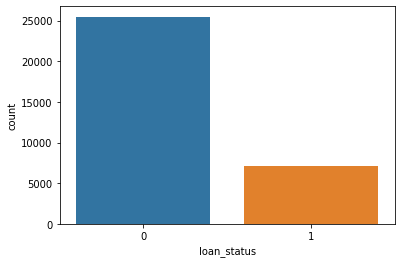

In [12]:
ax = sns.countplot(ycheck, label="Count")
S, D = ycheck.value_counts()
print("Count Loan Status 0: ", S)
print("Count Loan Status 1: ", D)

##### - After Balancing Dataset with Loan Status Class

In [13]:
non_loan_status = df[df['loan_status']==0]
loan_status = df[df['loan_status']==1]

In [14]:
non_loan_status.shape, loan_status.shape

((25473, 12), (7108, 12))

In [15]:
non_loan_status = non_loan_status.sample(loan_status.shape[0])
loan_status.shape

(7108, 12)

In [16]:
non_loan_status.shape, loan_status.shape

((7108, 12), (7108, 12))

In [17]:
df = loan_status.append(non_loan_status, ignore_index=True)
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [18]:
df["loan_status"].value_counts()

0    7108
1    7108
Name: loan_status, dtype: int64

Count Loan Status 0 :  7108
Count Loan Status 1 :  7108


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


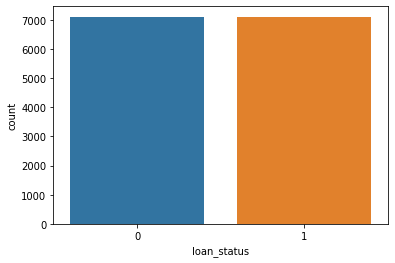

In [19]:
ax = sns.countplot(df["loan_status"], label="Count")
S, D = df["loan_status"].value_counts()
print("Count Loan Status 0 : ", S)
print("Count Loan Status 1 : ", D)

### Find Correlation Between Feature and Class

##### - Find Unique Value Per Feature and Class

In [20]:
for col in df:
    print(f'{col}: {df[col].unique()}')

person_age: [22 25 23 24 21 26 20 29 33 28 35 31 34 27 30 32 36 45 37 44 40 39 43 47
 38 48 42 41 49 50 46 65 53 58 54 66 57 51 62 60 55 52 61 70 63 56 64 94
 78 76 73]
person_income: [ 59000   9600  65500 ...  45678 214200 200004]
person_home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
person_emp_length: [123.   1.   4.   8.   2.   5.   6.   7.   3.   0.   9.  10.  11.  12.
  14.  13.  18.  15.  16.  19.  17.  20.  22.  21.  24.  23.  26.  27.
  34.  29.  30.  28.  41.]
loan_intent: ['PERSONAL' 'MEDICAL' 'VENTURE' 'EDUCATION' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'C' 'A' 'B' 'E' 'F' 'G']
loan_amnt: [35000  5500  2500  1600  4500  1750 34000 33950 33000  4575 32500  4000
  2000 31050 30000 10000 25000 29100  3000 28000  6100  4200  4750  2700
 27600  3250 27500 27050 27000 26000 25475 11900 25300  3650  2400  3600
  4950 22000  7750 20000  6000  5375  6250  6200  4475  4600  3175  2800
  5000  3300  3200 24000  5600  3625  4375 24750 24250  3900 24150  4975
  3500  

##### - Converting person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file to numerical value

In [21]:
df2 = df

In [22]:
df2 = df2.replace(to_replace=['RENT','MORTGAGE','OWN','OTHER'], value=[4, 3, 2, 1]) 
df2 = df2.replace(to_replace=['PERSONAL','MEDICAL','VENTURE','EDUCATION','HOMEIMPROVEMENT','DEBTCONSOLIDATION'], value=[6,5,4,3, 2, 1])
df2 = df2.replace(to_replace=['A','B','C','D','E','F','G'], value=[1,2,3,4,5,6,7])
df2 = df2.replace(to_replace=['N', 'Y'], value=[0, 1])

In [23]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

person_age: [22 25 23 24 21 26 20 29 33 28 35 31 34 27 30 32 36 45 37 44 40 39 43 47
 38 48 42 41 49 50 46 65 53 58 54 66 57 51 62 60 55 52 61 70 63 56 64 94
 78 76 73]
person_income: [ 59000   9600  65500 ...  45678 214200 200004]
person_home_ownership: [4 3 2 1]
person_emp_length: [123.   1.   4.   8.   2.   5.   6.   7.   3.   0.   9.  10.  11.  12.
  14.  13.  18.  15.  16.  19.  17.  20.  22.  21.  24.  23.  26.  27.
  34.  29.  30.  28.  41.]
loan_intent: [6 5 4 3 2 1]
loan_grade: [4 3 1 2 5 6 7]
loan_amnt: [35000  5500  2500  1600  4500  1750 34000 33950 33000  4575 32500  4000
  2000 31050 30000 10000 25000 29100  3000 28000  6100  4200  4750  2700
 27600  3250 27500 27050 27000 26000 25475 11900 25300  3650  2400  3600
  4950 22000  7750 20000  6000  5375  6250  6200  4475  4600  3175  2800
  5000  3300  3200 24000  5600  3625  4375 24750 24250  3900 24150  4975
  3500  4900 13000 23975 23600 23575  5400  3375 23400 23000 22750 22500
 22400 22250  7400 21700 21600  7000 21500 

##### - Split Data Between Feature Class and Class

In [24]:
X = df2.drop("loan_status", axis = 1) # semua kolom selain "loan_status" adalah feature
y = df2["loan_status"] # label kita adalah kolom "loan_status"

In [25]:
X.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,14216.000000,1.421600e+04,14216.000000,14216.000000,14216.000000,14216.000000,14216.000000,14216.000000,14216.000000,14216.000000,14216.000000
mean,27.629572,5.938278e+04,3.513998,4.380346,3.581669,2.513576,9983.293472,10.655305,0.197585,0.224887,5.760763
std,6.238643,4.850351e+04,0.631521,4.088938,1.711380,1.299568,6637.218349,4.705597,0.122133,0.417523,4.066933
min,20.000000,4.000000e+03,1.000000,0.000000,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.400000e+04,3.000000,1.000000,2.000000,1.000000,5000.000000,7.740000,0.100000,0.000000,3.000000
50%,26.000000,5.000000e+04,4.000000,4.000000,4.000000,2.000000,8400.000000,11.340000,0.170000,0.000000,4.000000
75%,30.000000,7.200000e+04,4.000000,7.000000,5.000000,3.000000,14000.000000,14.110000,0.280000,0.000000,8.000000
max,94.000000,2.039784e+06,4.000000,123.000000,6.000000,7.000000,35000.000000,23.220000,0.780000,1.000000,30.000000


##### - Normalize and Standarization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'person_age'),
  Text(1, 0, 'person_income'),
  Text(2, 0, 'person_home_ownership'),
  Text(3, 0, 'person_emp_length'),
  Text(4, 0, 'loan_intent'),
  Text(5, 0, 'loan_grade'),
  Text(6, 0, 'loan_amnt'),
  Text(7, 0, 'loan_int_rate'),
  Text(8, 0, 'loan_percent_income'),
  Text(9, 0, 'cb_person_default_on_file'),
  Text(10, 0, 'cb_person_cred_hist_length')])

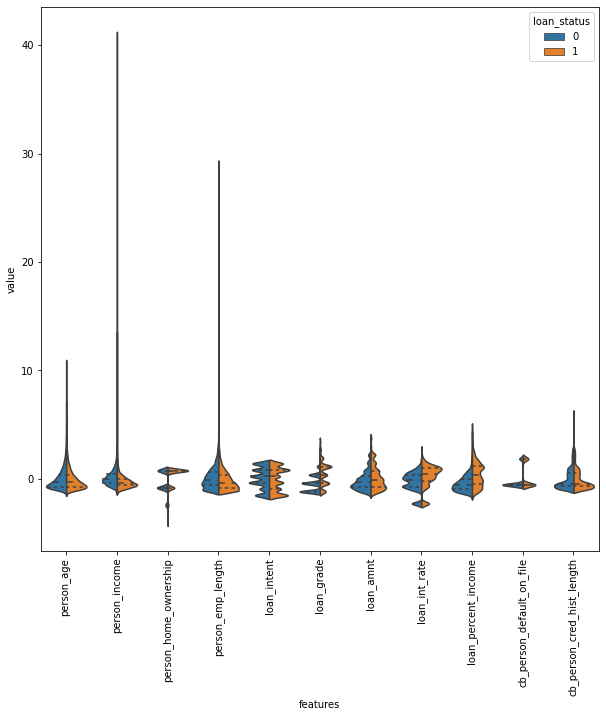

In [26]:
data_standardized = (X - X.mean() ) / X.std()
data = pd.concat([y, data_standardized], axis =1)
data = pd.melt(data, id_vars = "loan_status",
                var_name="features",
                value_name="value"
              )
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="loan_status",
              data=data, split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'person_age'),
  Text(1.5, 0, 'person_income'),
  Text(2.5, 0, 'person_home_ownership'),
  Text(3.5, 0, 'person_emp_length'),
  Text(4.5, 0, 'loan_intent'),
  Text(5.5, 0, 'loan_grade'),
  Text(6.5, 0, 'loan_amnt'),
  Text(7.5, 0, 'loan_int_rate'),
  Text(8.5, 0, 'loan_percent_income'),
  Text(9.5, 0, 'cb_person_default_on_file'),
  Text(10.5, 0, 'cb_person_cred_hist_length')])

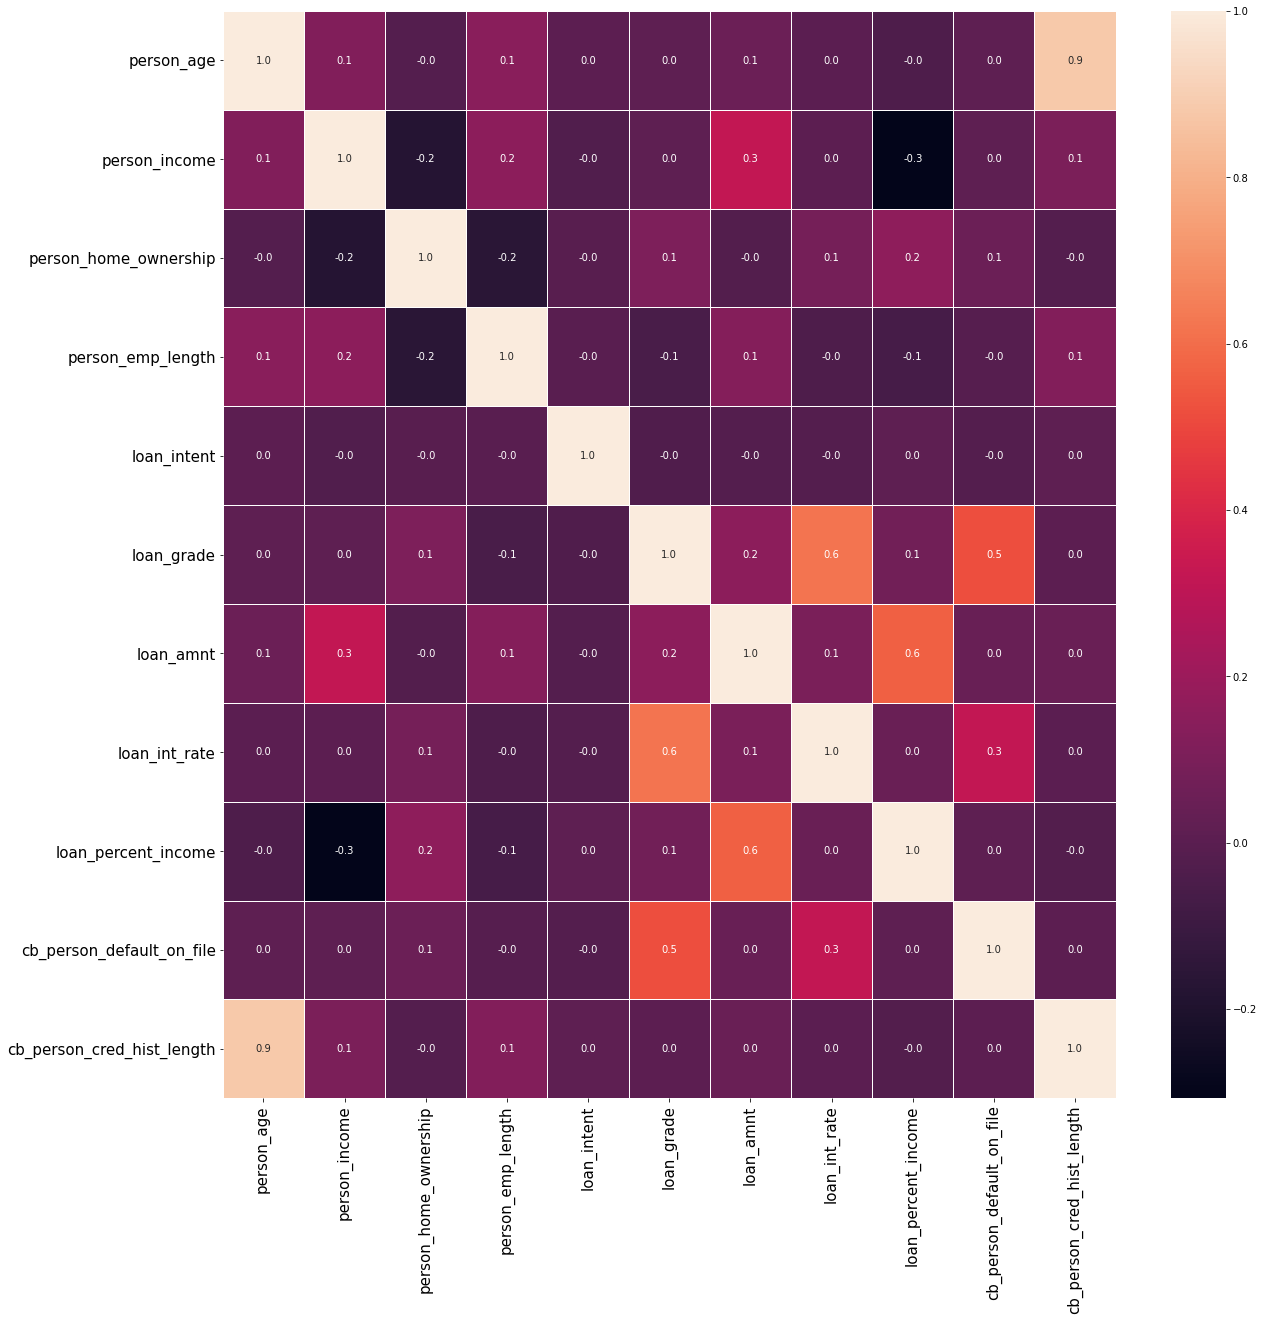

In [27]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax, )
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

### Data Preprocessing Before Implement Deep Learning Model

In [28]:
df3 = df

In [29]:
df3.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
5,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
6,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
7,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
8,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
9,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4


In [30]:
df3.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [31]:
for col in df3:
    print(f'{col}: {df3[col].unique()}')

person_age: [22 25 23 24 21 26 20 29 33 28 35 31 34 27 30 32 36 45 37 44 40 39 43 47
 38 48 42 41 49 50 46 65 53 58 54 66 57 51 62 60 55 52 61 70 63 56 64 94
 78 76 73]
person_income: [ 59000   9600  65500 ...  45678 214200 200004]
person_home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
person_emp_length: [123.   1.   4.   8.   2.   5.   6.   7.   3.   0.   9.  10.  11.  12.
  14.  13.  18.  15.  16.  19.  17.  20.  22.  21.  24.  23.  26.  27.
  34.  29.  30.  28.  41.]
loan_intent: ['PERSONAL' 'MEDICAL' 'VENTURE' 'EDUCATION' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade: ['D' 'C' 'A' 'B' 'E' 'F' 'G']
loan_amnt: [35000  5500  2500  1600  4500  1750 34000 33950 33000  4575 32500  4000
  2000 31050 30000 10000 25000 29100  3000 28000  6100  4200  4750  2700
 27600  3250 27500 27050 27000 26000 25475 11900 25300  3650  2400  3600
  4950 22000  7750 20000  6000  5375  6250  6200  4475  4600  3175  2800
  5000  3300  3200 24000  5600  3625  4375 24750 24250  3900 24150  4975
  3500  

##### - Converting cb_person_default_on_file 'N','Y' to '1','0' values

In [32]:
df3 = df3.replace(to_replace=['N', 'Y'], value=[0, 1])

In [33]:
df3['cb_person_default_on_file'].unique()

array([1, 0], dtype=int64)

##### - Converting categorial feature to dummy binary feature

In [34]:
df3 = pd.get_dummies(data=df3, columns=['person_home_ownership','loan_intent','loan_grade'])

In [35]:
df3.head(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0,...,0,1,0,0,0,0,1,0,0,0
1,25,9600,1.0,5500,12.87,1,0.57,0,3,1,...,1,0,0,0,0,1,0,0,0,0
2,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,1,0,0,0,0,1,0,0,0,0
3,24,54400,8.0,35000,14.27,1,0.55,1,4,0,...,1,0,0,0,0,1,0,0,0,0
4,21,9900,2.0,2500,7.14,1,0.25,0,2,0,...,0,0,1,1,0,0,0,0,0,0
5,26,77100,8.0,35000,12.42,1,0.45,0,3,0,...,0,0,0,0,1,0,0,0,0,0
6,24,78956,5.0,35000,11.11,1,0.44,0,4,0,...,1,0,0,0,1,0,0,0,0,0
7,24,83000,8.0,35000,8.90,1,0.42,0,2,0,...,0,1,0,1,0,0,0,0,0,0
8,21,10000,6.0,1600,14.74,1,0.16,0,3,0,...,0,0,1,0,0,0,1,0,0,0
9,22,85000,6.0,35000,10.37,1,0.41,0,4,0,...,0,0,1,0,1,0,0,0,0,0


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14216 entries, 0 to 14215
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      14216 non-null  int64  
 1   person_income                   14216 non-null  int64  
 2   person_emp_length               14216 non-null  float64
 3   loan_amnt                       14216 non-null  int64  
 4   loan_int_rate                   14216 non-null  float64
 5   loan_status                     14216 non-null  int64  
 6   loan_percent_income             14216 non-null  float64
 7   cb_person_default_on_file       14216 non-null  int64  
 8   cb_person_cred_hist_length      14216 non-null  int64  
 9   person_home_ownership_MORTGAGE  14216 non-null  uint8  
 10  person_home_ownership_OTHER     14216 non-null  uint8  
 11  person_home_ownership_OWN       14216 non-null  uint8  
 12  person_home_ownership_RENT      

In [44]:
df3["loan_status"].value_counts()

0    7108
1    7108
Name: loan_status, dtype: int64

### Split Data Between Feature and Class Before Implement Deep Learning Model

In [45]:
X = df3.drop('loan_status', axis=1)
y = df3['loan_status']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0, stratify = y)

In [47]:
X_train.shape, X_test.shape

((11372, 25), (2844, 25))

### Standard Scaler

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [50]:
X_train.shape

(11372, 25)

In [51]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

### Implement CNN Model using Tensorflow

In [60]:
num_epochs = 200
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 24, 32)            96        
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 32)            128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 32)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 23, 64)            4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 23, 64)            256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 23, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1472)             

In [62]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
356/356 [==============================] - 4s 7ms/step - loss: 0.5588 - accuracy: 0.7630 - val_loss: 0.4836 - val_accuracy: 0.8020
Epoch 2/200
356/356 [==============================] - 2s 6ms/step - loss: 0.4427 - accuracy: 0.8007 - val_loss: 0.3953 - val_accuracy: 0.8217
Epoch 3/200
356/356 [==============================] - 2s 6ms/step - loss: 0.4152 - accuracy: 0.8131 - val_loss: 0.3813 - val_accuracy: 0.8288
Epoch 4/200
356/356 [==============================] - 2s 6ms/step - loss: 0.4036 - accuracy: 0.8143 - val_loss: 0.3671 - val_accuracy: 0.8330
Epoch 5/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3947 - accuracy: 0.8217 - val_loss: 0.3657 - val_accuracy: 0.8267
Epoch 6/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3873 - accuracy: 0.8225 - val_loss: 0.3591 - val_accuracy: 0.8319
Epoch 7/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3786 - accuracy: 0.8280 - val_loss: 0.3605 - val_accuracy: 0.8379

356/356 [==============================] - 18s 52ms/step - loss: 0.3200 - accuracy: 0.8501 - val_loss: 0.3254 - val_accuracy: 0.8442s - loss: 0.
Epoch 57/200
356/356 [==============================] - 4s 10ms/step - loss: 0.3228 - accuracy: 0.8490 - val_loss: 0.3307 - val_accuracy: 0.8418
Epoch 58/200
356/356 [==============================] - 3s 9ms/step - loss: 0.3213 - accuracy: 0.8504 - val_loss: 0.3294 - val_accuracy: 0.8425
Epoch 59/200
356/356 [==============================] - 3s 8ms/step - loss: 0.3251 - accuracy: 0.8466 - val_loss: 0.3316 - val_accuracy: 0.8428
Epoch 60/200
356/356 [==============================] - 3s 8ms/step - loss: 0.3224 - accuracy: 0.8502 - val_loss: 0.3324 - val_accuracy: 0.8418
Epoch 61/200
356/356 [==============================] - 3s 7ms/step - loss: 0.3189 - accuracy: 0.8509 - val_loss: 0.3285 - val_accuracy: 0.8379
Epoch 62/200
356/356 [==============================] - 3s 8ms/step - loss: 0.3243 - accuracy: 0.8494 - val_loss: 0.3277 - val_accurac

Epoch 113/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3109 - accuracy: 0.8552 - val_loss: 0.3285 - val_accuracy: 0.8421
Epoch 114/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3141 - accuracy: 0.8527 - val_loss: 0.3334 - val_accuracy: 0.8432
Epoch 115/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3103 - accuracy: 0.8554 - val_loss: 0.3250 - val_accuracy: 0.8421
Epoch 116/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3121 - accuracy: 0.8551 - val_loss: 0.3263 - val_accuracy: 0.8407
Epoch 117/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3105 - accuracy: 0.8546 - val_loss: 0.3259 - val_accuracy: 0.8449
Epoch 118/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3064 - accuracy: 0.8572 - val_loss: 0.3248 - val_accuracy: 0.8428
Epoch 119/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3074 - accuracy: 0.8563 - val_loss: 0.3271 - val_ac

356/356 [==============================] - 2s 6ms/step - loss: 0.3062 - accuracy: 0.8554 - val_loss: 0.3268 - val_accuracy: 0.8425
Epoch 170/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3057 - accuracy: 0.8573 - val_loss: 0.3220 - val_accuracy: 0.8446
Epoch 171/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3010 - accuracy: 0.8560 - val_loss: 0.3253 - val_accuracy: 0.8435
Epoch 172/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3047 - accuracy: 0.8550 - val_loss: 0.3286 - val_accuracy: 0.8418
Epoch 173/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3020 - accuracy: 0.8570 - val_loss: 0.3287 - val_accuracy: 0.8432
Epoch 174/200
356/356 [==============================] - 2s 7ms/step - loss: 0.3067 - accuracy: 0.8543 - val_loss: 0.3280 - val_accuracy: 0.8425
Epoch 175/200
356/356 [==============================] - 2s 6ms/step - loss: 0.3033 - accuracy: 0.8597 - val_loss: 0.3289 - val_accuracy: 0.8428

In [64]:
def plot_learningCurve(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.plot('Model loss')
    plt.plot('Epoch')
    plt.legend(['Train','Val'], loc='upper left')
    plt.show

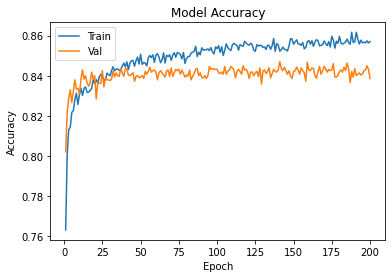

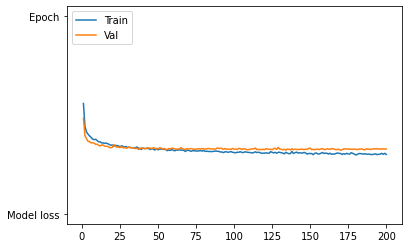

In [65]:
plot_learningCurve(history, num_epochs)

In [66]:
num_epochs = 200
model = Sequential()
model.add(Conv1D(32,2,activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
356/356 [==============================] - 3s 5ms/step - loss: 1.2118 - accuracy: 0.5456 - val_loss: 0.5619 - val_accuracy: 0.7138
Epoch 2/200
356/356 [==============================] - 2s 4ms/step - loss: 0.9125 - accuracy: 0.6153 - val_loss: 0.5241 - val_accuracy: 0.7479
Epoch 3/200
356/356 [==============================] - 2s 4ms/step - loss: 0.7890 - accuracy: 0.6442 - val_loss: 0.5100 - val_accuracy: 0.7598
Epoch 4/200
356/356 [==============================] - 1s 4ms/step - loss: 0.7231 - accuracy: 0.6687 - val_loss: 0.4981 - val_accuracy: 0.7750
Epoch 5/200
356/356 [==============================] - 2s 4ms/step - loss: 0.6662 - accuracy: 0.6859 - val_loss: 0.4931 - val_accuracy: 0.7792
Epoch 6/200
356/356 [==============================] - 2s 4ms/step - loss: 0.6342 - accuracy: 0.6936 - val_loss: 0.4877 - val_accuracy: 0.7841
Epoch 7/200
356/356 [==============================] - 2s 4ms/step - loss: 0.5996 - accuracy: 0.7067 - val_loss: 0.4844 - val_accuracy: 0.7852

Epoch 58/200
356/356 [==============================] - 2s 4ms/step - loss: 0.4296 - accuracy: 0.8036 - val_loss: 0.3971 - val_accuracy: 0.8119
Epoch 59/200
356/356 [==============================] - 2s 4ms/step - loss: 0.4325 - accuracy: 0.8006 - val_loss: 0.3968 - val_accuracy: 0.8129
Epoch 60/200
356/356 [==============================] - 2s 4ms/step - loss: 0.4301 - accuracy: 0.7999 - val_loss: 0.3960 - val_accuracy: 0.8129
Epoch 61/200
356/356 [==============================] - 2s 5ms/step - loss: 0.4342 - accuracy: 0.8001 - val_loss: 0.3964 - val_accuracy: 0.8119
Epoch 62/200
356/356 [==============================] - 2s 5ms/step - loss: 0.4319 - accuracy: 0.8000 - val_loss: 0.3962 - val_accuracy: 0.8122
Epoch 63/200
356/356 [==============================] - 2s 5ms/step - loss: 0.4342 - accuracy: 0.8007 - val_loss: 0.3954 - val_accuracy: 0.8133
Epoch 64/200
356/356 [==============================] - 2s 5ms/step - loss: 0.4305 - accuracy: 0.8039 - val_loss: 0.3946 - val_accuracy:

356/356 [==============================] - 1s 4ms/step - loss: 0.4089 - accuracy: 0.8109 - val_loss: 0.3805 - val_accuracy: 0.8196
Epoch 115/200
356/356 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8123 - val_loss: 0.3808 - val_accuracy: 0.8207
Epoch 116/200
356/356 [==============================] - 2s 4ms/step - loss: 0.4077 - accuracy: 0.8157 - val_loss: 0.3799 - val_accuracy: 0.8207
Epoch 117/200
356/356 [==============================] - 2s 4ms/step - loss: 0.4059 - accuracy: 0.8143 - val_loss: 0.3790 - val_accuracy: 0.8217
Epoch 118/200
356/356 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8123 - val_loss: 0.3796 - val_accuracy: 0.8210
Epoch 119/200
356/356 [==============================] - 1s 4ms/step - loss: 0.4008 - accuracy: 0.8157 - val_loss: 0.3798 - val_accuracy: 0.8186
Epoch 120/200
356/356 [==============================] - 1s 4ms/step - loss: 0.4056 - accuracy: 0.8115 - val_loss: 0.3795 - val_accuracy: 0.8200

356/356 [==============================] - 1s 4ms/step - loss: 0.3965 - accuracy: 0.8147 - val_loss: 0.3699 - val_accuracy: 0.8235
Epoch 171/200
356/356 [==============================] - 1s 4ms/step - loss: 0.3905 - accuracy: 0.8203 - val_loss: 0.3702 - val_accuracy: 0.8221
Epoch 172/200
356/356 [==============================] - 1s 4ms/step - loss: 0.3951 - accuracy: 0.8158 - val_loss: 0.3699 - val_accuracy: 0.8245
Epoch 173/200
356/356 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8192 - val_loss: 0.3701 - val_accuracy: 0.8217
Epoch 174/200
356/356 [==============================] - 1s 4ms/step - loss: 0.3919 - accuracy: 0.8211 - val_loss: 0.3701 - val_accuracy: 0.8228
Epoch 175/200
356/356 [==============================] - 1s 4ms/step - loss: 0.3916 - accuracy: 0.8188 - val_loss: 0.3695 - val_accuracy: 0.8228
Epoch 176/200
356/356 [==============================] - 1s 4ms/step - loss: 0.3969 - accuracy: 0.8168 - val_loss: 0.3695 - val_accuracy: 0.8238

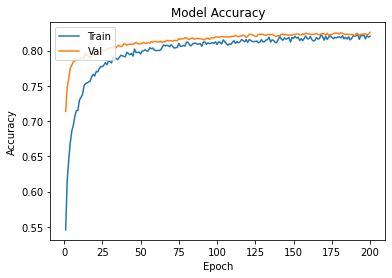

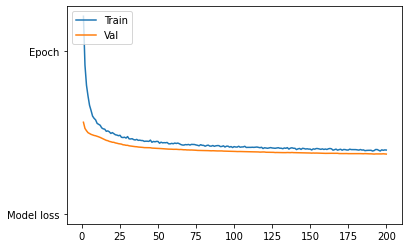

In [67]:
plot_learningCurve(history, num_epochs)